In [663]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [680]:
df_csv = pd.read_csv('cleanDatasets/master_dataset.csv')
df = pd.DataFrame(df_csv)
print("Number of records: " + str(len(df)))
df.head()
# df.lic_code.unique()

Number of records: 2232


,business_name,lic_code,street_address,business_start_date,business_end_date,Lifespan,isClosed,full_address,business_id,name,...,HD02_S151,HD02_S170,HD02_S171,HD02_S180,HD02_S181,HD02_S184,Opening_year,Closing_year,Opening_month,Closing_month
0,yokai express inc,NaN,135 4th st ste 4000,2017-12-28,NaN,221.0,no,"135 4th st ste 4000, San Francisco, CA, 94103",94310,yokai express,...,28.6,82.2,17.8,100.0,37.2,62.8,2017,NaN,12,NaN
1,sizzling pot king,"Restaurant 1,000 - 2,000 Sqft",139 8th st,2017-12-28,NaN,221.0,no,"139 8th st, San Francisco, CA, 94103",94408,sizzling pot king,...,23.8,81.6,18.4,100.0,9.4,90.6,2017,NaN,12,NaN
2,burma super star restaurant,"Restaurant 1,000 - 2,000 Sqft",309 clement st,2001-03-01,NaN,6367.0,no,"309 clement st, San Francisco, CA, 94118",1977,burma superstar restaurant,...,44.1,92.1,7.9,100.0,27.5,72.5,2001,NaN,3,NaN
3,foundation cafe,NaN,645 5th st,2017-12-15,NaN,234.0,no,"645 5th st, San Francisco, CA, 94107",94387,foundation cafe,...,26.5,94.0,6.0,100.0,39.9,60.1,2017,NaN,12,NaN
4,new york pizza kitchen,NaN,127 eddy st,2016-03-16,2017-03-14,363.0,yes,"127 eddy st, San Francisco, CA, 94102",91028,new york pizza kitchen,...,24.4,87.6,12.4,100.0,2.5,97.5,2016,2017.0,3,3.0


In [681]:
# Filter

df = df[df['Opening_year'] >= 2010] # Only restaurants opened after 2010.

dfN = df[df['lic_code'].isnull() == True] # Identify locations with null lic_code
dfN['business_name'].unique() # Observe location by name, make determination about what to drop

# Dropping restaurant locations that are part of hotels, schools, have incomplete names
df = df.drop(df[df.business_name.isin(["sf hilton banquet facility","san francisco proper hotel  villon",
                                      'j  e restaurant', 'epicurean at mercy high school'
                                      ])].index)

# We want restaurants, not locations specialized in beverages
df = df[df.business_name.str.contains("cafe") == False]
df = df[df.business_name.str.contains("coffee") == False]
df = df[df.business_name.str.contains("tea") == False]
df = df[df.business_name.str.contains("juice") == False]
df = df[df.business_name.str.contains("boba") == False]

# # Might as well remove the handful of bars/taverns that serve food (only 3)
df = df.drop(df[df.lic_code.isin(["Bars/taverns W/food Prep"])].index)

# # Assigns LIC_Code to matching locations (ex: there might be 3 restaurants with the same name, a chain in these cases, and only one of those will have a LIC.)
df['lic_code'] = df['lic_code'].groupby(df['business_name']).ffill()


print(len(df))

983


In [682]:
g_csv = pd.read_csv('places_price_ratings.csv')
g = pd.DataFrame(g_csv)

df = df.join(g, lsuffix=['business_name'], rsuffix=['input_string'])
len(df)
df.head()

,business_name,lic_code,street_address,business_start_date,business_end_date,Lifespan,isClosed,full_address,business_id,name['business_name'],...,Unnamed: 0,formatted_address,input_string,latitude['input_string'],longitude['input_string'],name['input_string'],number_of_results,price_level,rating,status
0,yokai express inc,NaN,135 4th st ste 4000,2017-12-28,NaN,221.0,no,"135 4th st ste 4000, San Francisco, CA, 94103",94310,yokai express,...,0,"135 4th St, San Francisco, CA 94103, USA",yokai express inc,37.784272,-122.403159,Yo-Kai Express @ Metreon,1,NaN,4.0,OK
1,sizzling pot king,"Restaurant 1,000 - 2,000 Sqft",139 8th st,2017-12-28,NaN,221.0,no,"139 8th st, San Francisco, CA, 94103",94408,sizzling pot king,...,1,"139 8th St, San Francisco, CA 94103, USA",sizzling pot king,37.777172,-122.412601,Sizzling Pot King,1,2.0,4.3,OK
4,new york pizza kitchen,NaN,127 eddy st,2016-03-16,2017-03-14,363.0,yes,"127 eddy st, San Francisco, CA, 94102",91028,new york pizza kitchen,...,4,"127 Eddy St, San Francisco, CA 94102, USA",new york pizza kitchen,37.784192,-122.409762,New York Pizza Kitchen,1,1.0,3.8,OK
5,braised + bread,"Restaurant 1,000 - 2,000 Sqft",50 post st unit 65a,2018-01-02,NaN,216.0,no,"50 post st unit 65a, San Francisco, CA, 94104",94432,braised + bread,...,5,NaN,corner bakery cafe #1584,NaN,NaN,NaN,0,NaN,NaN,REQUEST_DENIED
6,joint venture kitchen,"Restaurant 1,000 - 2,000 Sqft",167 11th street,2017-06-26,NaN,406.0,no,"167 11th street, San Francisco, CA, 94103",92980,joint venture kitchen,...,6,"3228 Sacramento St, San Francisco, CA 94115, USA",sorrel restaurant,37.788561,-122.446188,Sorrel,1,3.0,4.7,OK


In [683]:
# Add Rating and Price info from the Google Places API.
df = df.drop(['input_string','Unnamed: 0',"latitude['input_string']","longitude['input_string']",
            "name['input_string']",'number_of_results','status','input_string','formatted_address'],
                        axis=1)
# Dropped rows with Nulls for ratings and price
df = df.dropna(subset=['price_level','rating'])
print(len(df))

681


In [684]:
# Spatial.AI info

sp_csv = pd.read_csv('cleanDatasets/spatial_info.csv')
sp = pd.DataFrame(sp_csv)
print(list(sp))
sp = sp.drop(['latitude','longitude'],
                        axis=1)
df = df.join(sp, lsuffix='business_name', rsuffix='business_name')



df['Foodie_16'] = df[['Q1_16_Foodie', 'Q2_16_Foodie', 'Q3_16_Foodie', 'Q4_16_Foodie']].mean(axis=1)
df['Foodie_17'] = df[['Q1_17_Foodie', 'Q2_17_Foodie', 'Q3_17_Foodie', 'Q4_17_Foodie']].mean(axis=1)

df = df.rename(columns={"business_namebusiness_name": 'business_name'})
df = df.drop(["name['business_name']"], axis=1)

print(len(df))
df.head()

['business_name', 'latitude', 'longitude', 'Q1_16_Nature_Exp', 'Q2_16_Nature_Exp', 'Q3_16_Nature_Exp', 'Q4_16_Nature_Exp', 'Q1_17_Nature_Exp', 'Q2_17_Nature_Exp', 'Q3_17_Nature_Exp', 'Q4_17_Nature_Exp', 'Q1_16_Family_Fun', 'Q2_16_Family_Fun', 'Q3_16_Family_Fun', 'Q4_16_Family_Fun', 'Q1_17_Family_Fun', 'Q2_17_Family_Fun', 'Q3_17_Family_Fun', 'Q4_17_Family_Fun', 'Q1_16_Healthy_Lifestyle', 'Q2_16_Healthy_Lifestyle', 'Q3_16_Healthy_Lifestyle', 'Q4_16_Healthy_Lifestyle', 'Q1_17_Healthy_Lifestyle', 'Q2_17_Healthy_Lifestyle', 'Q3_17_Healthy_Lifestyle', 'Q4_17_Healthy_Lifestyle', 'Q1_16_Nightlife_Hotspot', 'Q2_16_Nightlife_Hotspot', 'Q3_16_Nightlife_Hotspot', 'Q4_16_Nightlife_Hotspot', 'Q1_17_Nightlife_Hotspot', 'Q2_17_Nightlife_Hotspot', 'Q3_17_Nightlife_Hotspot', 'Q4_17_Nightlife_Hotspot', 'Q1_16_Artsy', 'Q2_16_Artsy', 'Q3_16_Artsy', 'Q4_16_Artsy', 'Q1_17_Artsy', 'Q2_17_Artsy', 'Q3_17_Artsy', 'Q4_17_Artsy', 'Q1_16_Foodie', 'Q2_16_Foodie', 'Q3_16_Foodie', 'Q4_16_Foodie', 'Q1_17_Foodie', 'Q2_1

,business_name,lic_code,street_address,business_start_date,business_end_date,Lifespan,isClosed,full_address,business_id,district,...,Q1_16_Beautiful_Scenery,Q2_16_Beautiful_Scenery,Q3_16_Beautiful_Scenery,Q4_16_Beautiful_Scenery,Q1_17_Beautiful_Scenery,Q2_17_Beautiful_Scenery,Q3_17_Beautiful_Scenery,Q4_17_Beautiful_Scenery,Foodie_16,Foodie_17
1,sizzling pot king,"Restaurant 1,000 - 2,000 Sqft",139 8th st,2017-12-28,NaN,221.0,no,"139 8th st, San Francisco, CA, 94103",94408,South of Market,...,48.81,44.99,44.90,38.12,43.44,30.95,35.42,38.21,71.7725,72.4775
4,new york pizza kitchen,NaN,127 eddy st,2016-03-16,2017-03-14,363.0,yes,"127 eddy st, San Francisco, CA, 94102",91028,Tenderloin,...,67.69,78.21,75.89,77.29,77.06,69.04,58.59,56.70,78.1975,77.4675
6,joint venture kitchen,"Restaurant 1,000 - 2,000 Sqft",167 11th street,2017-06-26,NaN,406.0,no,"167 11th street, San Francisco, CA, 94103",92980,South of Market,...,11.56,18.19,18.74,18.07,17.89,18.40,18.42,18.29,61.0425,61.7450
11,yan yan seafood resaurant,"Restaurant Greater Than 2,000 Sqft",2241 judah st,2014-07-01,NaN,1497.0,no,"2241 judah st, San Francisco, CA, 94122",79565,Outer Sunset,...,79.95,83.50,80.00,89.47,80.00,80.00,79.96,79.99,76.9625,78.2350
16,mr bread,"Restaurant Less Than 1,000 Sqft",1018 taraval st,2018-01-02,NaN,216.0,no,"1018 taraval st, San Francisco, CA, 94116",94616,Parkside,...,14.43,21.53,39.63,48.64,55.52,52.29,35.91,46.91,77.1225,76.1700


In [685]:
df.to_csv("cleanDatasets/master_dataset2010.csv",index=False)
df_csv = pd.read_csv('cleanDatasets/master_dataset2010.csv')
df = pd.DataFrame(df_csv)
print(len(df))

681


In [686]:
print('-------------------Filter Data Summary---------------------')
print('**********************************************************************')
print('--------------------Number of Openings, 2010-2018---------------------')
print(df.groupby('Opening_year').size())
print('--------------------Number of Closures, 2010-2018---------------------')
print(df.groupby('Closing_year').size())
print('----------------Count of restaurants openings, by districts--------------------')
df_openLocations = df[df['isClosed'] == "no"]
print(pd.value_counts(df_openLocations['district'].values, sort=True))
print('----------------Count of restaurants closures, by districts--------------------')
df_closedLocations = df[df['isClosed'] == "yes"]
print(pd.value_counts(df_closedLocations['district'].values, sort=True))
print('----------------------------------------------------------------------')
print('Restaurants "Chains", i.e. with multiple locations. NOT DUPLICATES')
print(df.groupby('business_name').filter(lambda x: len(x) > 2).sort_values(by ='business_name',ascending=False))
print('--------------------Count of restaurants, by type---------------------')
print(pd.value_counts(df['lic_code'].values, sort=True))
print('--------------------Count of Ratings, by type---------------------')
print(pd.value_counts(df['rating'].values, sort=True))
print('--------------------Count of Price Ranges, by type---------------------')
print(pd.value_counts(df['price_level'].values, sort=True))
print('----------------Foodie Average, by districts, 2017--------------------')
print(df['Foodie_17'].groupby(df['district']).mean().sort_values(ascending=False))
print('----------------Foodie Average, by districts, 2016--------------------')
print(df['Foodie_16'].groupby(df['district']).mean().sort_values(ascending=False))

-------------------Filter Data Summary---------------------
**********************************************************************
--------------------Number of Openings, 2010-2018---------------------
Opening_year
2010    62
2011    76
2012    78
2013    95
2014    90
2015    98
2016    99
2017    57
2018    26
dtype: int64
--------------------Number of Closures, 2010-2018---------------------
Closing_year
2015.0     8
2016.0    14
2017.0    29
2018.0     7
dtype: int64
----------------Count of restaurants openings, by districts--------------------
Mission                         53
South of Market                 48
Financial District              45
Inner Richmond                  33
Tenderloin                      32
Chinatown                       32
Outer Sunset                    24
Outer Richmond                  22
Lower Nob Hill                  22
Polk Gulch                      14
Inner Sunset                    13
North Beach                     12
Excelsior               

In [617]:
# dfN['business_name'].unique()
# df = df.dropna(subset=['lic_code']) # Remove NaN values in 'lic_code'
len(df)

983

In [618]:
# https://seaborn.pydata.org/tutorial/categorical.html
Cmonths = df["Closing_month"].dropna()
Cyears = df["Closing_year"].dropna()
sns.distplot(df["Opening_year"])
sns.distplot(Cyears)

<IPython.core.display.Javascript object>


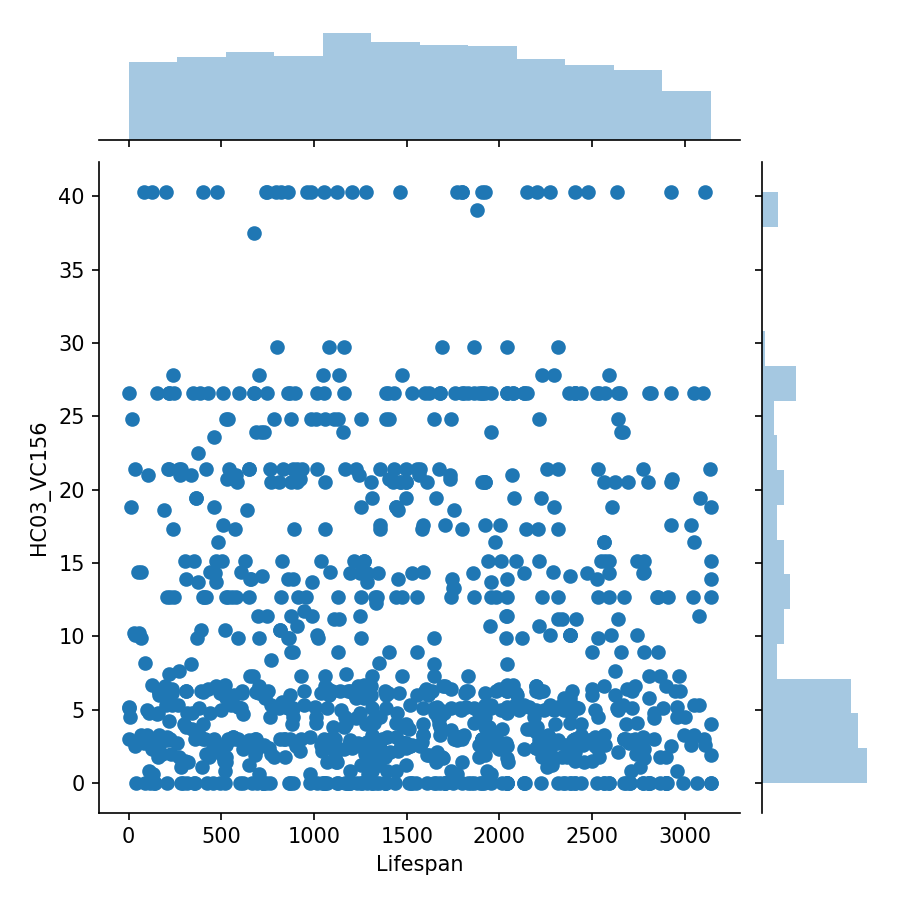

In [619]:
sns.jointplot(x='Lifespan', y='HC03_VC156', data = df);

<IPython.core.display.Javascript object>


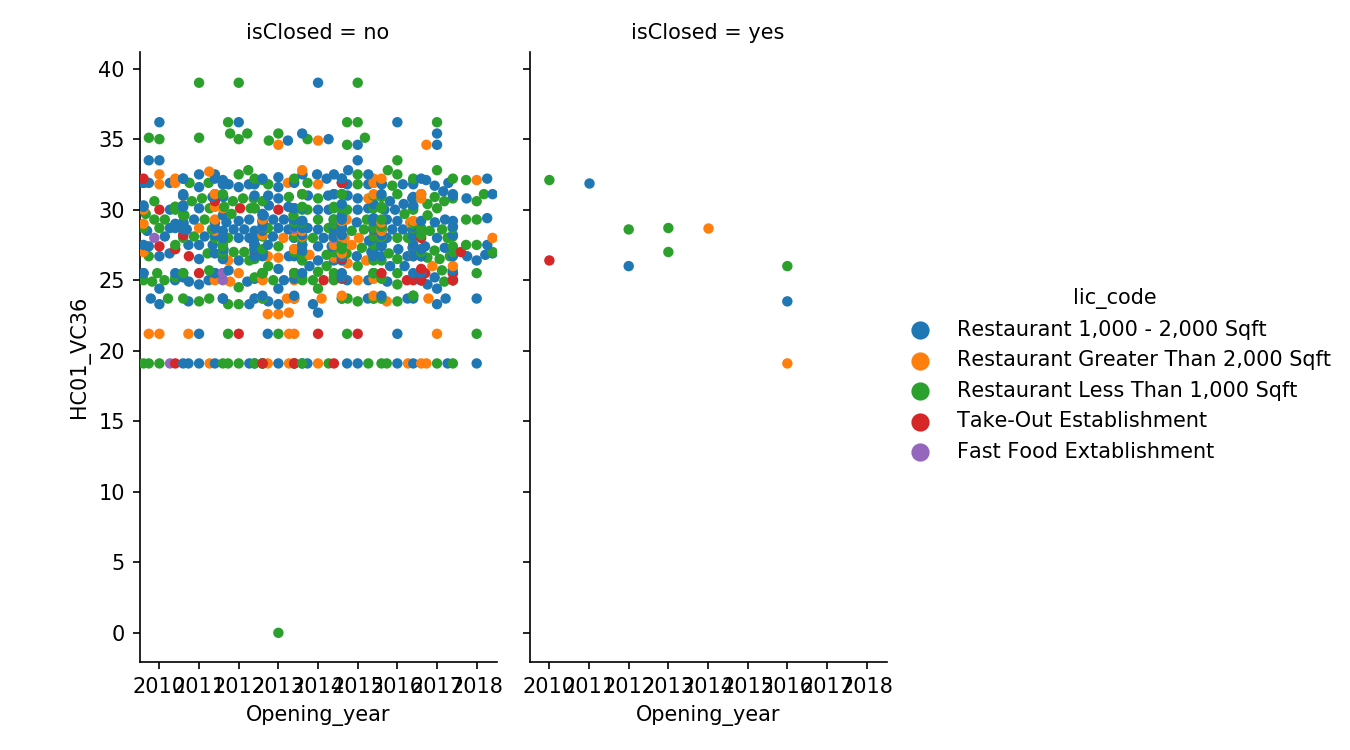

In [620]:
sns.catplot(x="Opening_year", y="HC01_VC36", hue="lic_code",
            col="isClosed", aspect=.6,
            kind="swarm", data=df);

# HC01_VC36 is mean travel time for workers (census tract level) in minutes

<IPython.core.display.Javascript object>


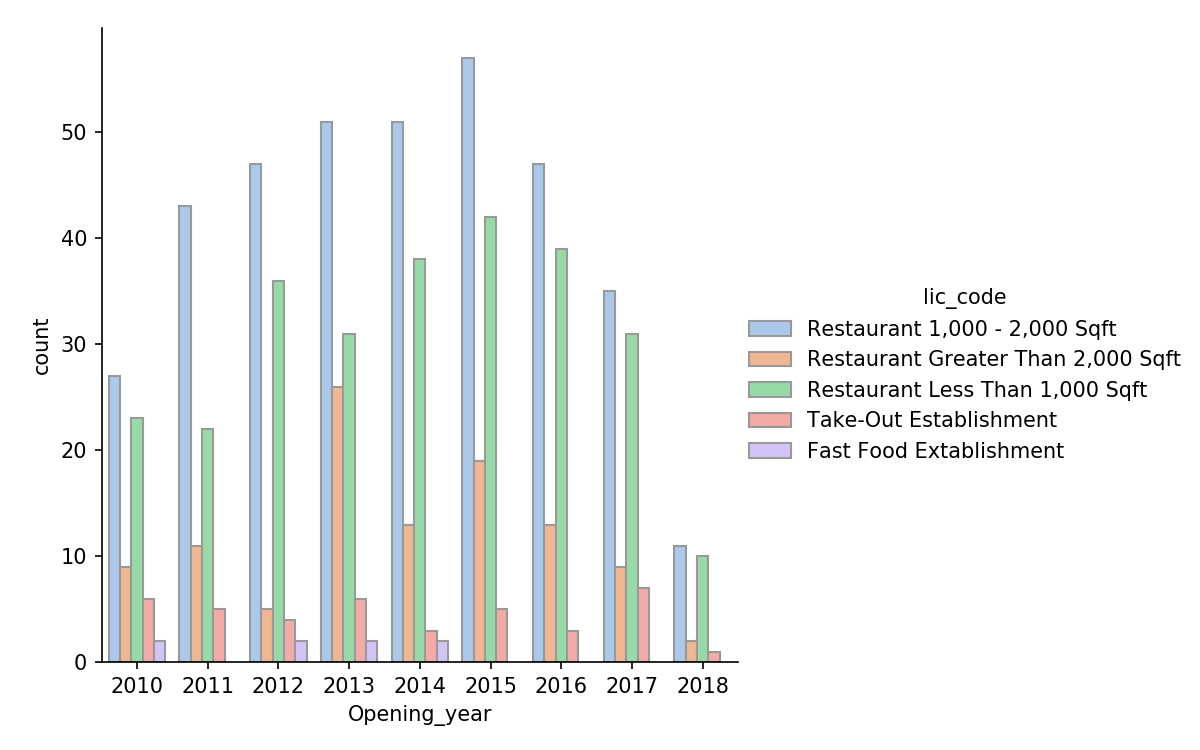

In [621]:
sns.catplot(x="Opening_year", hue="lic_code", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

In [ ]:
####################################### Regression Testing ########################################################33

In [541]:
# One Hot-Encoding binary (True/False variables)
    # https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables
    # https://www.kaggle.com/getting-started/27270
df = df.dropna(subset=['lic_code'])
df['isClosed'] = pd.get_dummies(df['isClosed']) # no: 1, yes: 0

df['price_level'] = df['price_level'].round(0).astype(int) # No need for encoding, just convert to int.

In [542]:
# Categorical encoding: http://pbpython.com/categorical-encoding.html
df["lic_code"] = df["lic_code"].dropna().astype('category')
df["lic_code"].dtype

CategoricalDtype(categories=['Fast Food Extablishment', 'Restaurant 1,000 - 2,000 Sqft',
                  'Restaurant Greater Than 2,000 Sqft',
                  'Restaurant Less Than 1,000 Sqft', 'Take-Out Establishment'],
                 ordered=False)

In [543]:
df["lic_code_cat"] = df["lic_code"].cat.codes
# df["lic_code"] = df["lic_code"]
len(df)

561

In [437]:
# df['lic_code'] = df.lic_code.dropna()
# df['lic_code'] = pd.get_dummies(df['lic_code'])
# # Create a label (category) encoder object
# le = preprocessing.LabelEncoder()
# # # Fit the encoder to the pandas column
# le.fit(df['lic_code'])
# # Apply the fitted encoder to the pandas column
# le.transform(df['lic_code']) 

In [400]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 3))
# plt.hist(df.Lifespan)
# plt.xlabel('Lifespan (Days)')
# plt.ylabel('count')
# plt.tight_layout()

# plt.figure(figsize=(8, 3))
# plt.hist(df.MA)
# plt.xlabel('Healthscores')
# plt.ylabel('count')
# plt.tight_layout()

# plt.figure(figsize=(8, 3))
# plt.hist(df.HD01_S001)
# plt.xlabel('Population by Tracts')
# plt.ylabel('count')
# plt.tight_layout()

# plt.figure(figsize=(8, 3))
# plt.hist(df.Opening_year)
# plt.xlabel('Opening Year')
# plt.ylabel('count')
# plt.tight_layout()

# plt.figure(figsize=(8, 3))
# plt.hist(df.price_level.dropna())
# plt.xlabel('Price Levels')
# plt.ylabel('count')
# plt.tight_layout()

# plt.figure(figsize=(8, 3))
# plt.hist(df.rating.dropna())
# plt.xlabel('Ratings (from Google)')
# plt.ylabel('count')
# plt.tight_layout()

In [687]:
# Reference: https://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html#sphx-glr-packages-scikit-learn-auto-examples-plot-boston-prediction-py
# https://stackoverflow.com/questions/28334091/turning-a-pandas-dataframe-to-an-array-and-evaluate-multiple-linear-regression-m
from sklearn.linear_model import LinearRegression
df.shape
X = df[['Lifespan']].as_matrix()
y =df['Foodie_17'].values
model = LinearRegression()
model.fit(X, y)

C:\Users\White Base\AppData\Local\conda\conda\envs\FinalProject\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<IPython.core.display.Javascript object>


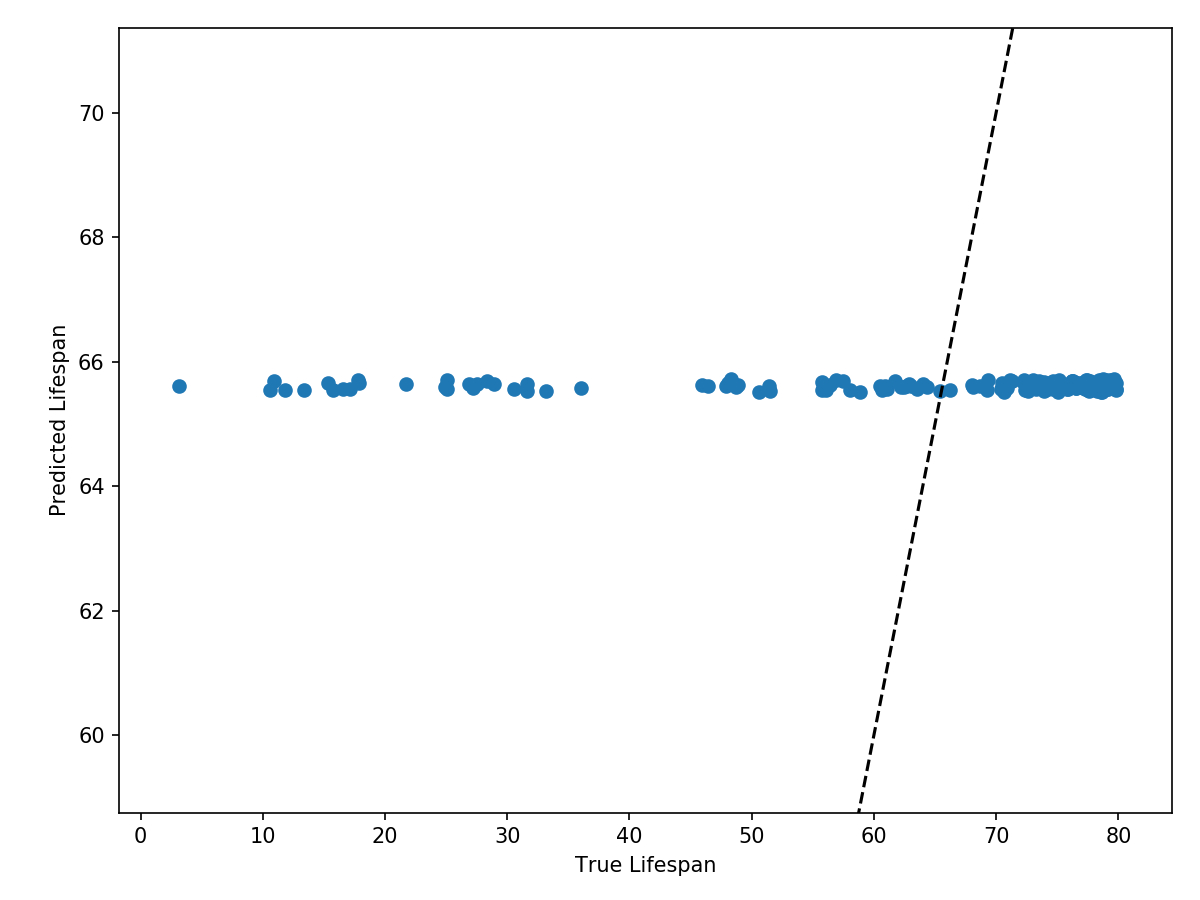

In [688]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(8, 6))
plt.scatter(expected, predicted)
plt.plot([0, 3500], [0, 3500], '--k')
plt.axis('tight')
plt.xlabel('True Lifespan')
plt.ylabel('Predicted Lifespan')
plt.tight_layout()

In [ ]:
https://www.scipy-lectures.org/packages/statistics/auto_examples/plot_wage_education_gender.html
http://andrewgaidus.com/Spatial_Econonometric_Modeling/
http://darribas.org/gds_scipy16/ipynb_md/08_spatial_regression.html
http://people.duke.edu/~rnau/testing.htm
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [357]:
# df.Lifespan.sort_values(ascending=False)

In [ ]:
###########################################################################################################################

In [589]:
list(df)

['business_name',
 'lic_code',
 'street_address',
 'business_start_date',
 'business_end_date',
 'Lifespan',
 'isClosed',
 'full_address',
 'business_id',
 'namebusiness_name',
 'district',
 'MA',
 'year',
 'latitudebusiness_name',
 'longitudebusiness_name',
 'tract',
 'GEOID10',
 'link',
 'HC01_VC05',
 'HC01_VC113',
 'HC01_VC115',
 'HC01_VC117',
 'HC01_VC121',
 'HC01_VC28',
 'HC01_VC36',
 'HC01_VC41',
 'HC01_VC42',
 'HC01_VC43',
 'HC01_VC44',
 'HC01_VC50',
 'HC01_VC51',
 'HC01_VC52',
 'HC01_VC53',
 'HC01_VC54',
 'HC01_VC55',
 'HC01_VC56',
 'HC01_VC57',
 'HC01_VC58',
 'HC01_VC59',
 'HC01_VC60',
 'HC01_VC61',
 'HC01_VC62',
 'HC01_VC67',
 'HC01_VC68',
 'HC01_VC69',
 'HC01_VC85',
 'HC01_VC86',
 'HC01_VC89',
 'HC01_VC99',
 'HC03_VC05',
 'HC03_VC13',
 'HC03_VC156',
 'HC03_VC28',
 'HC03_VC41',
 'HC03_VC42',
 'HC03_VC43',
 'HC03_VC44',
 'HC03_VC45',
 'HC03_VC50',
 'HC03_VC51',
 'HC03_VC52',
 'HC03_VC53',
 'HC03_VC54',
 'HC03_VC55',
 'HC03_VC56',
 'HC03_VC57',
 'HC03_VC58',
 'HC03_VC59',
 'HC0

In [549]:
df_reg = {
    'Lifespan',
}

,business_name,lic_code,street_address,business_start_date,business_end_date,Lifespan,isClosed,full_address,business_id,name,...,Q2_16_Beautiful_Scenery,Q3_16_Beautiful_Scenery,Q4_16_Beautiful_Scenery,Q1_17_Beautiful_Scenery,Q2_17_Beautiful_Scenery,Q3_17_Beautiful_Scenery,Q4_17_Beautiful_Scenery,Foodie_16,Foodie_17,lic_code_cat
0,sizzling pot king,"Restaurant 1,000 - 2,000 Sqft",139 8th st,2017-12-28,NaN,221.0,1,"139 8th st, San Francisco, CA, 94103",94408,sizzling pot king,...,44.99,44.90,38.12,43.44,30.95,35.42,38.21,71.7725,72.4775,1
2,joint venture kitchen,"Restaurant 1,000 - 2,000 Sqft",167 11th street,2017-06-26,NaN,406.0,1,"167 11th street, San Francisco, CA, 94103",92980,joint venture kitchen,...,18.19,18.74,18.07,17.89,18.40,18.42,18.29,61.0425,61.7450,1
3,yan yan seafood resaurant,"Restaurant Greater Than 2,000 Sqft",2241 judah st,2014-07-01,NaN,1497.0,1,"2241 judah st, San Francisco, CA, 94122",79565,yan yan seafood restaurant,...,83.50,80.00,89.47,80.00,80.00,79.96,79.99,76.9625,78.2350,2
4,mr bread,"Restaurant Less Than 1,000 Sqft",1018 taraval st,2018-01-02,NaN,216.0,1,"1018 taraval st, San Francisco, CA, 94116",94616,mr bread,...,21.53,39.63,48.64,55.52,52.29,35.91,46.91,77.1225,76.1700,3
7,toppu ramen dim sum house,"Restaurant 1,000 - 2,000 Sqft",941 kearny st,2018-01-17,NaN,201.0,1,"941 kearny st, San Francisco, CA, 94133",95363,toppu ramen dim sum house,...,24.36,16.78,41.03,21.11,28.19,20.80,24.55,77.6975,77.8775,1


In [550]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression(random_state=0)
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)
clf_D = RandomForestClassifier(random_state=1)

In [554]:
# Split in features and target
df_ml_features = df.drop('isClosed',axis = 1)
df_ml_target = df['isClosed']

In [555]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_features, df_ml_target, test_size = 0.2, random_state = 10,\
                                                    stratify = df_ml_target)

In [587]:
clf.fit(X_train,list(y_train.values))
y_pred = clf.predict(X_test)
print('Accuracy: ',clf.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred))
print('Recall: ',recall_score(list(y_test.values),y_pred))
print('F1 Score: ',f1_score(list(y_test.values),y_pred))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred))

AttributeError: 'numpy.ndarray' object has no attribute 'values'